In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## 1.Predict delivery time using sorting time 

### Reading data

In [2]:
ddata=pd.read_csv('../Datasets/delivery_time.csv')
ddata.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Rename Colums


In [3]:
ddata=ddata.rename({'Delivery Time':'Deliverytime','Sorting Time':'Sortingtime'}, axis=1)

In [4]:
ddata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliverytime  21 non-null     float64
 1   Sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


### Data Visualization

<Axes: xlabel='Deliverytime', ylabel='Density'>

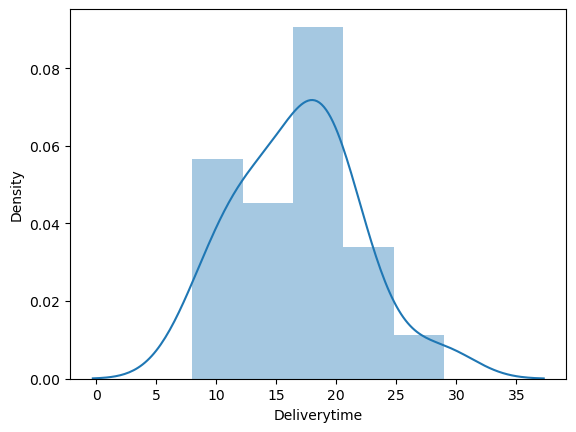

In [5]:
sns.distplot(ddata['Deliverytime'])

<Axes: xlabel='Sortingtime', ylabel='Density'>

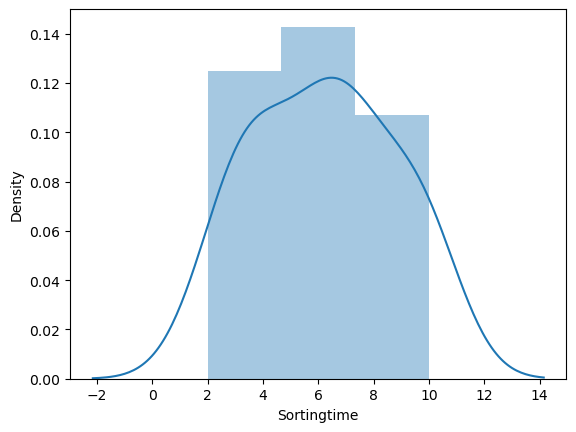

In [6]:
sns.distplot(ddata['Sortingtime'])

## Correlation Analysis

In [7]:
ddata.corr()

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


## Fitting a Linear Regression Model

<Axes: xlabel='Sortingtime', ylabel='Deliverytime'>

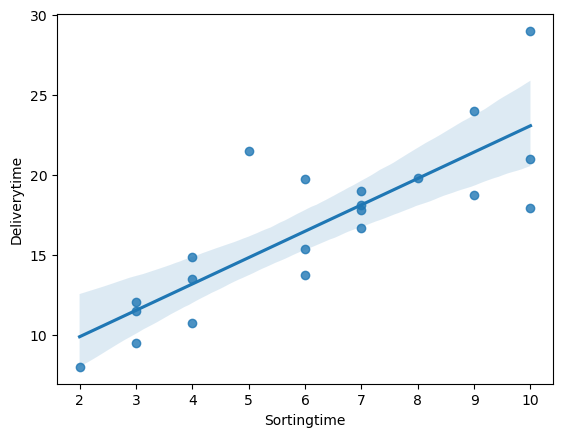

In [8]:
sns.regplot(x=ddata['Sortingtime'],y=ddata['Deliverytime'])


In [9]:
## model building

model=smf.ols("Deliverytime~Sortingtime",data=ddata).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        11:14:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model testing

In [11]:
## Coefficient parameters
model.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

In [12]:
## p and t values
print(model.tvalues)

Intercept      3.823349
Sortingtime    6.387447
dtype: float64


In [13]:
print(model.pvalues)

Intercept      0.001147
Sortingtime    0.000004
dtype: float64


In [14]:
## R squared values
print(model.rsquared)

0.6822714748417231


In [15]:
print(model.rsquared_adj)

0.6655489208860244


# Predict for new data point

In [16]:
#Predict for 6 and 8 sorting time
newdata=pd.Series([6,8])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['Sortingtime'])
data_pred

,Sortingtime
0,6
1,8


In [18]:
model.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

In [19]:
model.mse_resid

8.613660132645544

In [20]:
np.sqrt(model.mse_resid)

2.9349037688901394

## 2.Build a prediction model for Salary_hike

In [22]:
sal=pd.read_csv('../Datasets/Salary_Data.csv')

In [23]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA

In [24]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [25]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
sal[sal.duplicated()]

,YearsExperience,Salary


## Data Visualisaton

<Axes: xlabel='YearsExperience', ylabel='Density'>

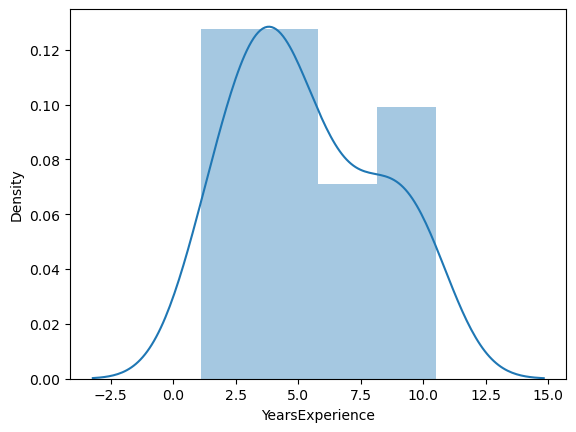

In [27]:
sns.distplot(sal['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

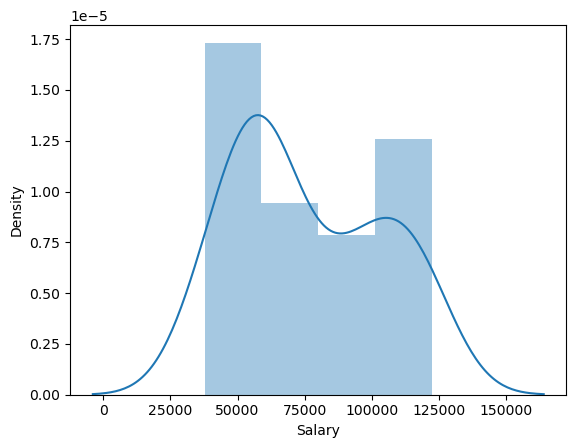

In [28]:
sns.distplot(sal['Salary'])

## Correlation

In [29]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

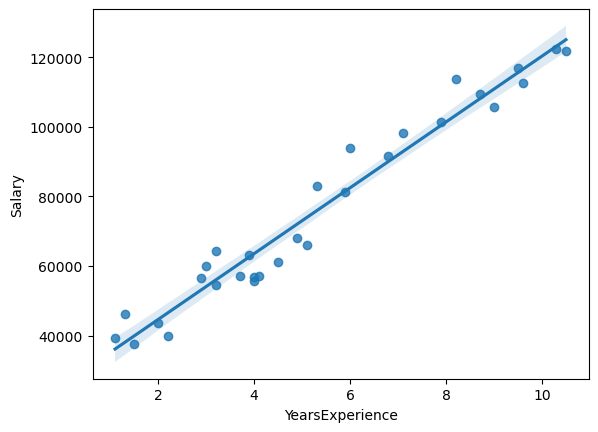

In [30]:
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'])

In [31]:
## Model building

model=smf.ols('Salary~YearsExperience',data=sal).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        11:15:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64


In [35]:
print(model.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [36]:
# R squared values
print(model.rsquared)

0.9569566641435086


In [37]:
print(model.rsquared_adj)

0.9554194021486339


# Predict for new data point

In [38]:
#Predict for 7and 10 years of experience
newdata=pd.Series([7,10])

In [39]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,7
1,10


In [40]:
model.predict(data_pred)

0     91941.936449
1    120291.823413
dtype: float64